| Feature | Description |
|---------|-------------|
| age     | Patient's age (in years) |
| sex     | Patient's gender (1: male; 0: female) |
| cp      | Chest pain type: 0 - asymptomatic, 1 - typical angina, 2 - atypical angina, 3 - non-anginal pain |
| trestbps| Resting blood pressure (in mm Hg) |
| chol    | Serum cholestoral in mg/dl |
| fbs     | Fasting blood sugar > 120 mg/dl (1: yes; 0: no) |
| restecg  | Resting ECG results: 0 - normal, 1 - ST-T wave abnormality, 2 - probable or definite left ventricular hypertrophy by Estes' criteria |
| thalach | Maximum heart rate achieved |
| exang   | Exercise induced angina (1: yes; 0: no) |
| oldpeak | ST depression induced by exercise relative to rest |
| slope   | The slope of the peak exercise ST segment: 0 - upsloping, 1 - flat, 2 - downsloping |
| ca      | Number of major vessels (0–3) colored by fluoroscopy |
| thal    | Thalassemia: 3 - Normal, 6 - Fixed defect, 7 - Reversible defect |
| target  | Whether the patient has hypertension (1) or not (0) |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib


In [2]:
df = pd.read_csv('Hypertension_New_after_drop.csv')


In [3]:
df.shape

(26058, 10)

In [4]:
df.head(30)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRate,STSegmentSlope,Hypertension
0,57.0,1.0,3,145,233,1,0,150,0,1
1,64.0,0.0,2,130,250,0,1,187,0,1
2,52.0,1.0,1,130,204,0,0,172,2,1
3,56.0,0.0,1,120,236,0,1,178,2,1
4,66.0,0.0,0,120,354,0,1,163,2,1
5,51.0,1.0,0,140,192,0,1,148,1,1
6,42.0,0.0,1,140,294,0,0,153,1,1
7,38.0,0.0,1,120,263,0,1,173,2,1
8,72.0,0.0,2,172,199,1,1,162,2,1
9,47.0,0.0,2,150,168,0,1,174,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26058 entries, 0 to 26057
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                26058 non-null  float64
 1   Sex                26058 non-null  float64
 2   ChestPainType      26058 non-null  int64  
 3   RestingBP          26058 non-null  int64  
 4   Cholesterol        26058 non-null  int64  
 5   FastingBloodSugar  26058 non-null  int64  
 6   RestECG            26058 non-null  int64  
 7   MaxHeartRate       26058 non-null  int64  
 8   STSegmentSlope     26058 non-null  int64  
 9   Hypertension       26058 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 2.0 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,26058.0,55.655730,15.190407,11.0,44.0,56.0,67.0,98.0
Sex,26058.0,0.500000,0.500010,0.0,0.0,0.5,1.0,1.0
ChestPainType,26058.0,0.956635,1.022467,0.0,0.0,1.0,2.0,3.0
RestingBP,26058.0,131.590682,17.597086,94.0,120.0,130.0,140.0,200.0
Cholesterol,26058.0,246.286591,51.651701,126.0,211.0,240.0,275.0,564.0
FastingBloodSugar,26058.0,0.149896,0.356977,0.0,0.0,0.0,0.0,1.0
RestECG,26058.0,0.526057,0.525688,0.0,0.0,1.0,1.0,2.0
MaxHeartRate,26058.0,149.643181,22.865871,71.0,133.0,153.0,166.0,202.0
STSegmentSlope,26058.0,1.399724,0.616529,0.0,1.0,1.0,2.0,2.0
Hypertension,26058.0,0.547778,0.497722,0.0,0.0,1.0,1.0,1.0


In [7]:
df.isnull().sum()

Age                  0
Sex                  0
ChestPainType        0
RestingBP            0
Cholesterol          0
FastingBloodSugar    0
RestECG              0
MaxHeartRate         0
STSegmentSlope       0
Hypertension         0
dtype: int64

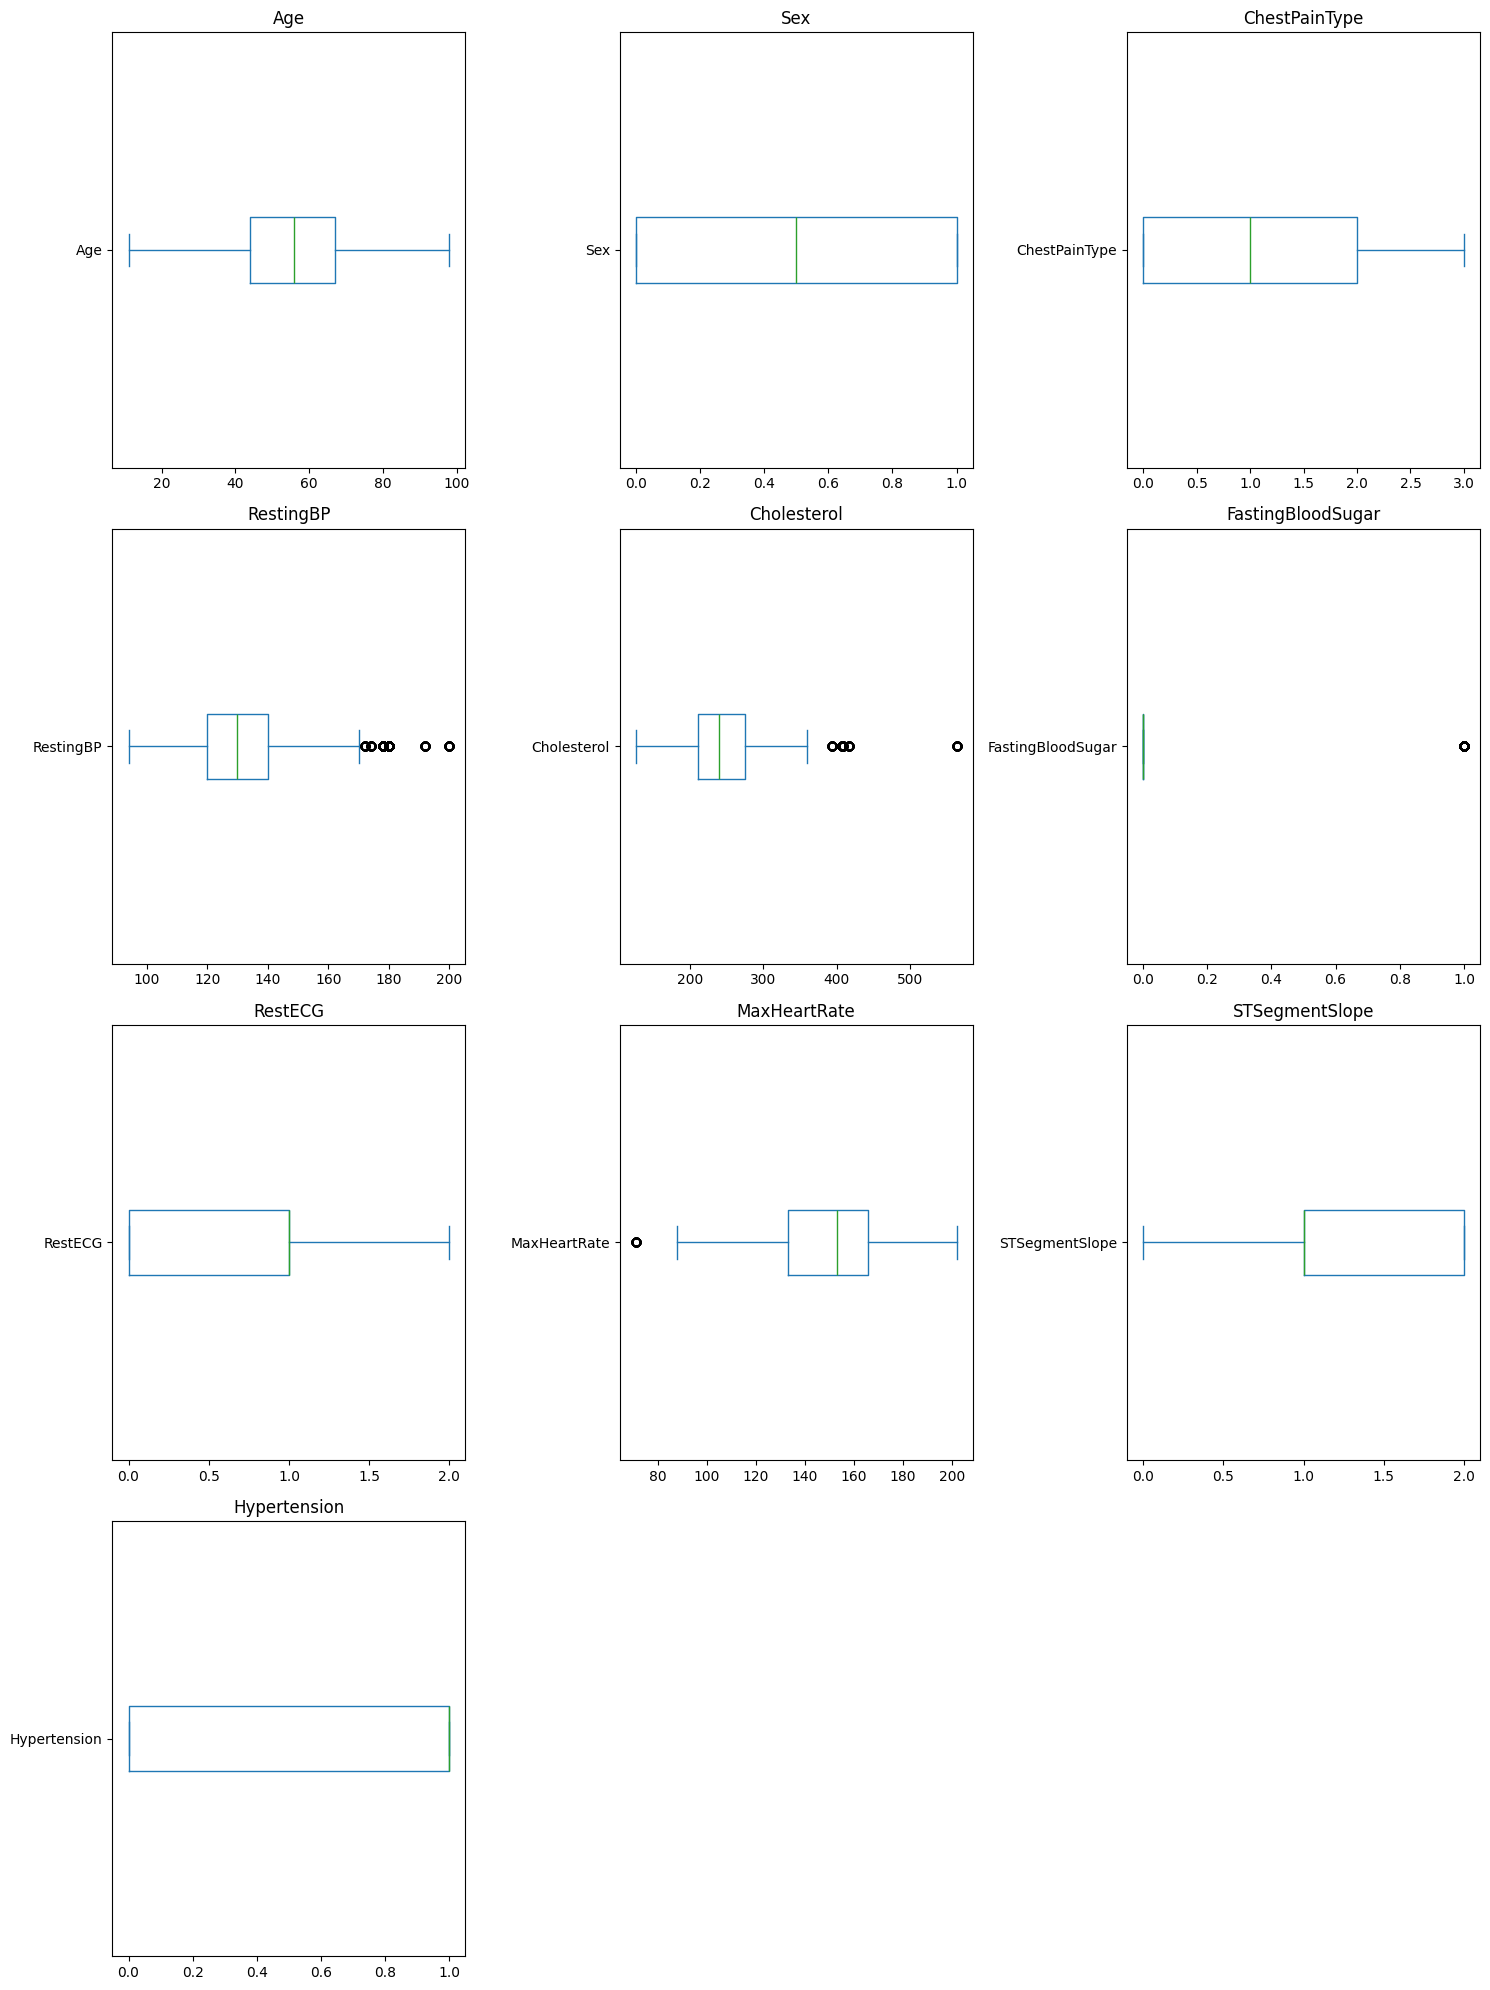

In [8]:

num_cols = len(df.columns)
num_rows = (num_cols - 1) // 3 + 1
plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 3, i+1)
    df[col].plot(kind='box', vert=False)
    plt.title(col)
plt.tight_layout()
plt.show()


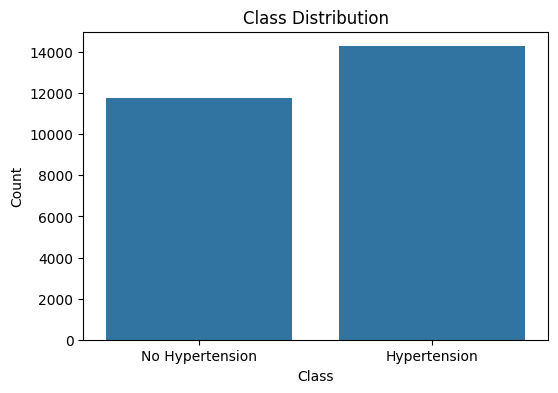

Class Distribution:
Hypertension
1    14274
0    11784
Name: count, dtype: int64


In [9]:
class_distribution = df['Hypertension'].value_counts()

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values )
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'Hypertension'])
plt.show()

# Print class distribution
print("Class Distribution:")
print(class_distribution)


In [10]:
correlation = df.corr()['Hypertension'].sort_values(ascending=False)


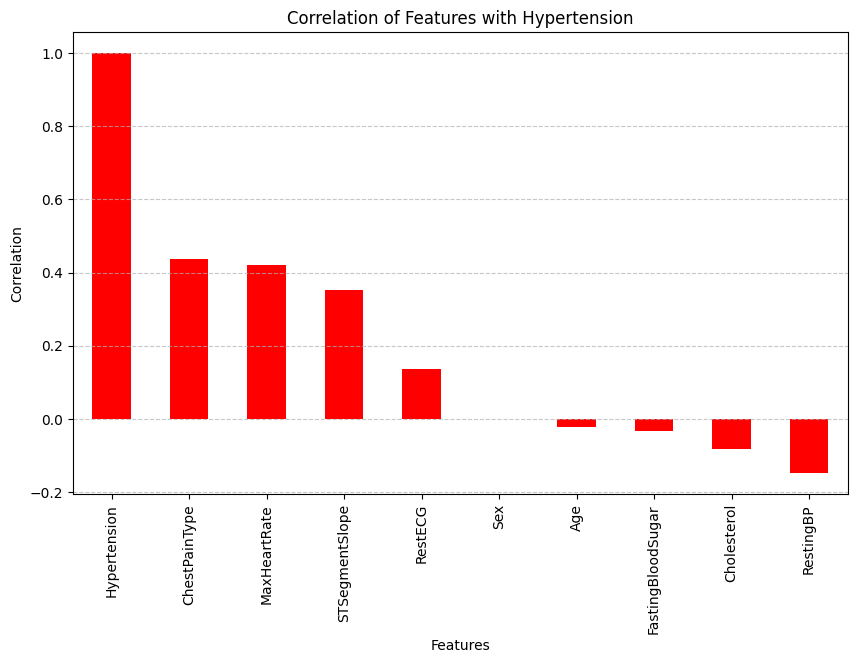

In [11]:
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar',color ='red')
plt.title('Correlation of Features with Hypertension')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
correlation = df.corr()['Hypertension'].sort_values(ascending=False)
correlation

Hypertension         1.000000e+00
ChestPainType        4.370111e-01
MaxHeartRate         4.199125e-01
STSegmentSlope       3.512253e-01
RestECG              1.371512e-01
Sex                  4.951044e-16
Age                 -2.316109e-02
FastingBloodSugar   -3.404579e-02
Cholesterol         -8.305517e-02
RestingBP           -1.484513e-01
Name: Hypertension, dtype: float64

In [13]:
X = df.drop(columns=['Hypertension'])
y = df['Hypertension']

In [14]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRate,STSegmentSlope
0,57.0,1.0,3,145,233,1,0,150,0
1,64.0,0.0,2,130,250,0,1,187,0
2,52.0,1.0,1,130,204,0,0,172,2
3,56.0,0.0,1,120,236,0,1,178,2
4,66.0,0.0,0,120,354,0,1,163,2
...,...,...,...,...,...,...,...,...,...
26053,72.0,0.0,0,138,294,1,1,106,1
26054,60.0,1.0,0,144,200,0,0,126,1
26055,68.0,1.0,0,100,234,0,1,156,2
26056,67.0,1.0,1,154,232,0,0,164,2


In [15]:
y

0        1
1        1
2        1
3        1
4        1
        ..
26053    0
26054    0
26055    0
26056    0
26057    0
Name: Hypertension, Length: 26058, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
Xtrain_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier


In [21]:
gbc=GradientBoostingClassifier(n_estimators=200)

In [22]:
gbc.fit(Xtrain_scaler ,y_train)

GradientBoostingClassifier(n_estimators=200)

In [23]:
y_pred_gbc = gbc.predict(X_test_scaler)


In [24]:
y_pred_gbc

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [25]:
accuracy_score(y_train ,gbc.predict(Xtrain_scaler))

0.9973684210526316

In [26]:
accuracy_score(y_pred_gbc,y_test)

0.9961627014581734

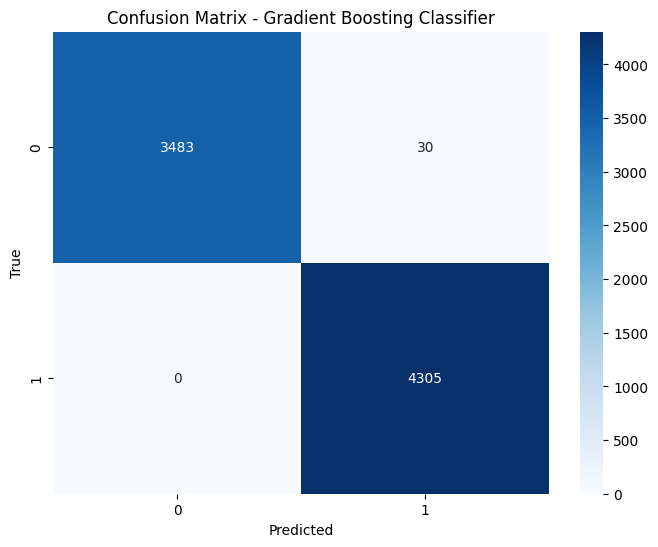

In [27]:
conf_mat_gbc = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_gbc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()


# **`Random Forest`** :

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_clf = RandomForestClassifier(n_estimators=250)
rf_clf.fit(Xtrain_scaler, y_train)


RandomForestClassifier(n_estimators=250)

In [35]:
y_pred_rf = rf_clf.predict(X_test_scaler)
y_pred_rf

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [36]:
accuracy_score(y_train ,rf_clf.predict(Xtrain_scaler))

1.0

In [37]:
accuracy_score(y_pred_rf,y_test)

1.0

In [34]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='sag') ,
    'Random Forest': RandomForestClassifier(n_estimators=250),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200),
    'Support Vector Machine': SVC(),
  'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

In [37]:
for name, clf in classifiers.items():
    clf.fit(Xtrain_scaler, y_train)
    y_pred = clf.predict(X_test_scaler)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f}")

Logistic Regression: Accuracy = 0.7471
Random Forest: Accuracy = 1.0000
Gradient Boosting: Accuracy = 0.9962
Support Vector Machine: Accuracy = 0.8886
k-Nearest Neighbors: Accuracy = 0.9832


In [39]:
joblib.dump(gbc, 'gbc_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(rf_clf, 'rf_model.pkl')


['rf_model.pkl']

**New Data Prediction**

In [41]:
gbc_model = joblib.load('gbc_model.pkl')
scaler = joblib.load('scaler.pkl')
rf_model = joblib.load('rf_model.pkl')

In [30]:
new_data = {
    'Age': [57],
    'Sex': [1],
    'ChestPainType': [3],
    'RestingBP': [145],
    'Cholesterol': [233],
    'FastingBloodSugar': [1],
    'RestECG': [0],
    'MaxHeartRate': [150],
    'STSegmentSlope': [0]
}

In [42]:
import joblib
import numpy as np

# Load scaler and model
scaler = joblib.load('scaler.pkl')
rf_model = joblib.load('rf_model.pkl')

# New data
new_data = {
    'Age': [57],
    'Sex': [1],
    'ChestPainType': [3],
    'RestingBP': [145],
    'Cholesterol': [233],
    'FastingBloodSugar': [1],
    'RestECG': [0],
    'MaxHeartRate': [150],
    'STSegmentSlope': [0]
}

# Transform data using scaler
scaled_data = scaler.transform(np.array([new_data['Age'], new_data['Sex'], new_data['ChestPainType'], 
                                          new_data['RestingBP'], new_data['Cholesterol'], 
                                          new_data['FastingBloodSugar'], new_data['RestECG'], 
                                          new_data['MaxHeartRate'], new_data['STSegmentSlope']]).T)

# Make prediction
prediction = rf_model.predict(scaled_data)

print("Prediction:", prediction)


Prediction: [1]


D:\newanaconda\envs\Newenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
new_data_0 = {
    'Age': [40],
    'Sex': [1],
    'ChestPainType': [0],
    'RestingBP': [140],
    'Cholesterol': [268],
    'FastingBloodSugar': [0],
    'RestECG': [0],
    'MaxHeartRate': [160],
    'STSegmentSlope': [0]
}

In [32]:
new_data_0

{'Age': [40],
 'Sex': [1],
 'ChestPainType': [0],
 'RestingBP': [140],
 'Cholesterol': [268],
 'FastingBloodSugar': [0],
 'RestECG': [0],
 'MaxHeartRate': [160],
 'STSegmentSlope': [0]}

In [33]:
new_df_0 = pd.DataFrame(new_data_0)


In [34]:

scaled_new_data_0 = scaler.transform(new_df_0)

predictions_0 = gbc_model.predict(scaled_new_data_0)

print("Predictions:", predictions_0)

Predictions: [0]


In [35]:
new_df = pd.DataFrame(new_data)


In [36]:
scaled_new_data = scaler.transform(new_df)


In [37]:
predictions = gbc_model.predict(scaled_new_data)


In [38]:

print("Predictions:", predictions)


Predictions: [1]
